In [1]:
from clustering.preprocess import Preprocess
from clustering.kmeans import KMeansClustering
from clustering.lda import LDA
import logging
logging.getLogger().setLevel(logging.INFO)

In [2]:
data_dev = Preprocess.open_csv("F:\Thesis\data\SemEval\hateval2019_en_dev.csv")
data_train = Preprocess.open_csv("F:\Thesis\data\SemEval\hateval2019_en_train.csv")
HS = '1'
TR = '1'
AG = '1'
filtered_dev = Preprocess.filter_sem_eval(X=data_dev, HS=HS, TR=TR, AG=AG)
filtered_train = Preprocess.filter_sem_eval(X=data_train, HS=HS, TR=TR, AG=AG)
filtered_data = filtered_dev + filtered_train
tweets = [x[1] for x in filtered_data]
cleaned_data = Preprocess.clean(X=tweets)
km = KMeansClustering()
X = km.fit_tfidf(cleaned_data)
X = km.fit_lsa(X)

INFO:root:Original data length: 1000
INFO:root:After applying filters: 109
INFO:root:Data length after removing invalid tweets: 48
INFO:root:Original data length: 9000
INFO:root:After applying filters: 461
INFO:root:Data length after removing invalid tweets: 160
INFO:root:Explained variance of the SVD step: 68%


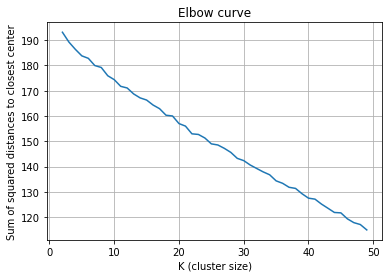

In [3]:
%matplotlib inline
km.plot_elbow_curve(max_k=50, X=X)

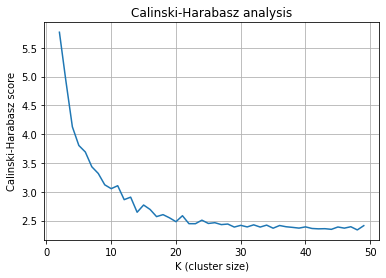

In [4]:
%matplotlib inline
# Higher values are better, when clusters are dense and well separated
km.plot_calinski_harabasz_analysis(max_k=50, X=X)

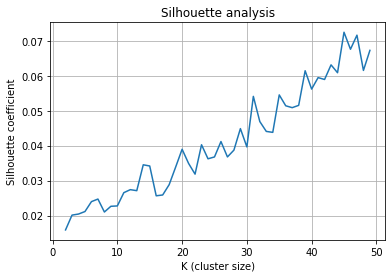

In [5]:
%matplotlib inline
# Higher values are better
km.plot_silhouette_analysis(max_k=50, X=X)

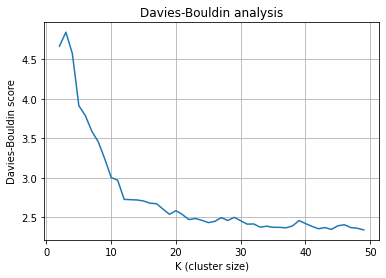

In [6]:
%matplotlib inline
# Values close to zero indicate a better partition
km.plot_davies_bouldin_score_analysis(max_k=50, X=X)

In [7]:
K = 5
km.cluster(X= X, K=K)
km.print_top_terms()

Cluster 0:
 fucking just whore cunt bitch stupid fuck youre die make

Cluster 1:
 ass bitch like shit dick beat pussy fuck ur whore

Cluster 2:
 bitch stop hoe im know skank stfu dont want dumb

Cluster 3:
 stfu pussy bitch hoe make lol aint smoke good ass

Cluster 4:
 shut fuck bitch fucking dont like slut youre pls afghanistan



In [8]:
NUM_SAMPLES=10
km.cluster(X= X, K=K)
km.print_most_representative_samples(original_data=filtered_data, X=X, num_samples=NUM_SAMPLES)

Cluster 0: most representative sample indices: [174 142 120 178  75 123   5 159 190 169]
['8728', 'STUPID FUCKING CUNT ASS CUNT BITCH DIDNT STOP AT HER STOP SIGN AND TOTALED MY FUCKING CAR THAT I USE TO MAKE FUCKING MONEY OH MY FUCKING GOD YOU STUPID FUCKING BITCH', '1', '1', '1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['6016', 'If only I could get out and beat the cunt that just hit my car with 5 fucking kids in it...cops are fucking looking for you bitch 507TVB', '1', '1', '1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['5459', 'Fuck off you stupid fucking CUNT OH MY GODDDDDDDD', '1', '1', '1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['8784', 'HOW FUCKING DARE YOU LOOK AT HER WHILE CALLING HIM HIS SPIRITUAL SON YOU CUNT FUCKING BITCH', '1', '1', '1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['4914', 'You mother fucking piece of trash stupid fucking idiot hoe i hope you fu

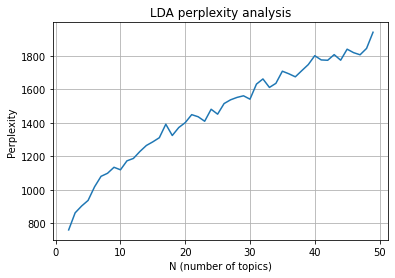

In [9]:
lda = LDA()
X = lda.fit_tf(X=cleaned_data)
# Lower values are better
# Perplexity indicates how well the probability model predicts the samples
lda.plot_perplexity(max_n=50, X=X)

In [10]:
pred = lda.fit_lda(X=X, n_components=10)
lda.print_top_terms()

Topic:  0
['men', 'don', 'whore', 'nigerian', 'bitch', 'talk', 'shit', 'stfu', 'stop', 'll']
Topic:  1
['bitch', 'just', 'cunt', 'look', 'die', 'ass', 'pussy', 'girl', 'know', 'skank']
Topic:  2
['bitch', 'fuck', 'stupid', 'just', 'face', 'cunt', 'dick', 'wanna', 'got', 'like']
Topic:  3
['pussy', 'stfu', 'im', 'make', 'yo', 'work', 'dont', 'say', 'working', 'bitch']
Topic:  4
['bitch', 'fucking', 'fuck', 'shut', 'stupid', 'whore', 'cunt', 'youre', 'stfu', 'hoe']
Topic:  5
['bitch', 'like', 'da', 'hoe', 'fuck', 'dick', 'want', 'know', 'nigga', 'whore']
Topic:  6
['bitch', 'ass', 'hoe', 'fuck', 'pussy', 'shut', 'got', 'skank', 'cause', 'ur']
Topic:  7
['bitch', 'whore', 'silent', 'skank', 'stfu', 'country', 'did', 'let', 'pussy', 'thank']
Topic:  8
['bitch', 'stfu', 'like', 'dont', 'fuck', 'stop', 'shut', 'know', 'want', 'pussy']
Topic:  9
['bitch', 'ass', 'im', 'just', 'stfu', 'stupid', 'rape', 'big', 'lol', 'like']
